# Using Convolutional Neural Networks

In [21]:
#import paskages 
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


### Download and prepare the dataset

In [2]:
# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)


In [3]:
# Get the tokenizer
tokenizer = info.features['text'].encoder

In [4]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

In [6]:
# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test']

In [7]:
# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

In [8]:
# Batch and pad the datasets to the maximum length of the sequences
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

### Build the Model

In [9]:
# Hyperparameters
batch_size = 1
timesteps = 20
features = 20
filters = 128
kernel_size = 5

In [10]:
print(f'batch_size: {batch_size}')
print(f'timesteps (sequence length): {timesteps}')
print(f'features (embedding size): {features}')
print(f'filters: {filters}')
print(f'kernel_size: {kernel_size}')

batch_size: 1
timesteps (sequence length): 20
features (embedding size): 20
filters: 128
kernel_size: 5


In [12]:
# Define array input with random values
random_input = np.random.rand(batch_size , timesteps , features)
print(f'shape of input array: {random_input.shape}')


shape of input array: (1, 20, 20)


In [13]:
# Pass array to convolution layer and inspect output shape
conv1d= tf.keras.layers.Conv1D(filters= filters , kernel_size=kernel_size , activation='relu')

In [14]:
result = conv1d(random_input)
print(f'shape of conv1d output: {result.shape}')

shape of conv1d output: (1, 16, 128)


In [15]:
# Pass array to max pooling layer and inspect output shape
gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f'shape of global max pooling output: {result.shape}')

shape of global max pooling output: (1, 128)


In [16]:
# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64


In [17]:
#build the mode 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [18]:
# Print  model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          523840    
                                                                 
 conv1d_1 (Conv1D)           (None, None, 128)         41088     
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 573249 (2.19 MB)
Trainable params: 573249 (2.19 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [19]:
# Set the training parameters
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train the model

In [20]:
NUM_EPOCHS = 10

# Train the model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
98/98 [==============================] - 143s 1s/step - loss: 0.6264 - accuracy: 0.6317 - val_loss: 0.4262 - val_accuracy: 0.8118
Epoch 2/10
98/98 [==============================] - 156s 2s/step - loss: 0.2976 - accuracy: 0.8751 - val_loss: 0.2650 - val_accuracy: 0.8885
Epoch 3/10
98/98 [==============================] - 140s 1s/step - loss: 0.1490 - accuracy: 0.9486 - val_loss: 0.2718 - val_accuracy: 0.8907
Epoch 4/10
98/98 [==============================] - 146s 1s/step - loss: 0.0644 - accuracy: 0.9860 - val_loss: 0.2922 - val_accuracy: 0.8909
Epoch 5/10
98/98 [==============================] - 155s 2s/step - loss: 0.0210 - accuracy: 0.9979 - val_loss: 0.3092 - val_accuracy: 0.8934
Epoch 6/10
98/98 [==============================] - 157s 2s/step - loss: 0.0072 - accuracy: 0.9998 - val_loss: 0.3335 - val_accuracy: 0.8934
Epoch 7/10
98/98 [==============================] - 139s 1s/step - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.3517 - val_accuracy: 0.8930
Epoch 8/10
98

In [24]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


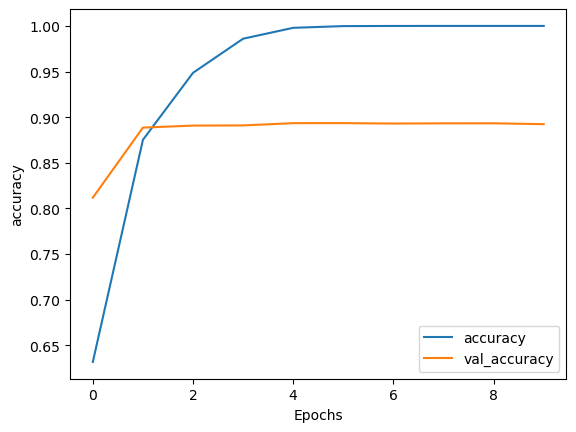

In [25]:
# Plot the accuracy and results 
plot_graphs(history, "accuracy")

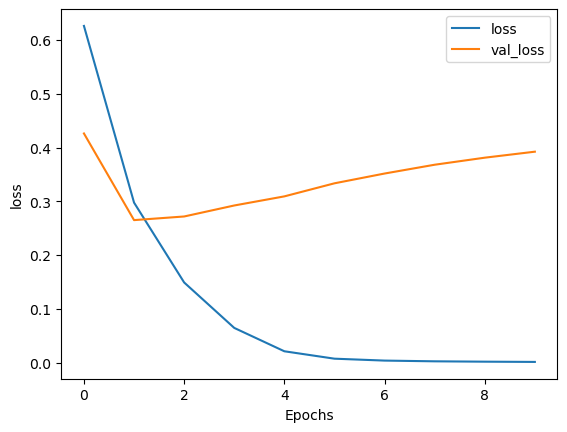

In [26]:
plot_graphs(history, "loss")
